In [20]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

## Clustering for Petal

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


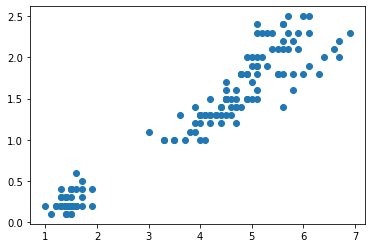

In [7]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [15]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [17]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
df['target'] = y_predicted
df.head(10)

,petal length (cm),petal width (cm),target
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
5,1.7,0.4,1
6,1.4,0.3,1
7,1.5,0.2,1
8,1.4,0.2,1
9,1.5,0.1,1


In [23]:
km.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

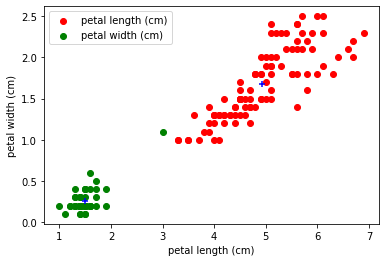

In [28]:
df1 = df[df.target==0]
df2 = df[df.target==1]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='blue', marker="+")

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['petal length (cm)', 'petal width (cm)'])

#### MinMaxScaler for petal

In [29]:
scalar = MinMaxScaler()

scalar.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scalar.transform(df[['petal length (cm)']])

scalar.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scalar.transform(df[['petal width (cm)']])

df.head(10)

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
5,0.118644,0.125000,1
6,0.067797,0.083333,1
7,0.084746,0.041667,1
8,0.067797,0.041667,1
9,0.084746,0.000000,1


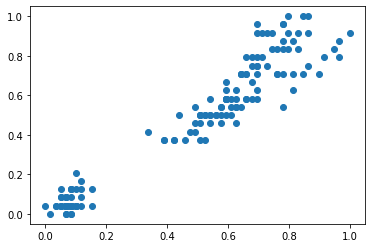

In [30]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [31]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
df['target'] = y_predicted
df.head(10)

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
5,0.118644,0.125000,1
6,0.067797,0.083333,1
7,0.084746,0.041667,1
8,0.067797,0.041667,1
9,0.084746,0.000000,1


In [33]:
km.cluster_centers_

array([[0.6620339 , 0.65666667],
       [0.07830508, 0.06083333]])

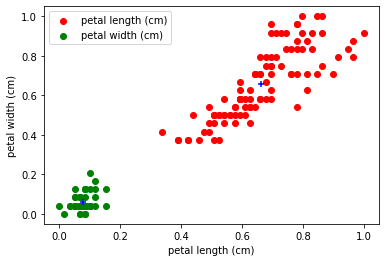

In [34]:
df1 = df[df.target==0]
df2 = df[df.target==1]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='blue', marker="+")

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['petal length (cm)', 'petal width (cm)'])

## Elbow Method

In [35]:
sse = []
km_range = range(1, 10)
for i in km_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

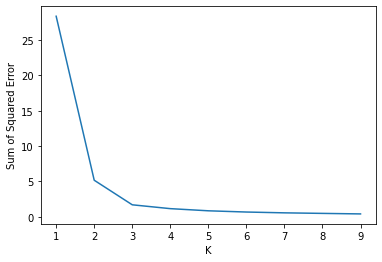

In [36]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(km_range, sse)

In [37]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
df['target'] = y_predicted
df.head(10)

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
5,0.118644,0.125000,1
6,0.067797,0.083333,1
7,0.084746,0.041667,1
8,0.067797,0.041667,1
9,0.084746,0.000000,1


In [39]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

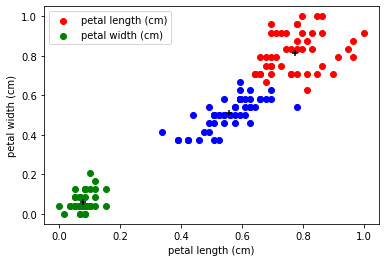

In [40]:
df1 = df[df.target==0]
df2 = df[df.target==1]
df3 = df[df.target==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker="+")

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(['petal length (cm)', 'petal width (cm)'])

## Clustering for sepal

In [41]:
df_n = pd.DataFrame(iris.data, columns=iris.feature_names)
df_n

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
df_n.drop(['petal length (cm)', 'petal width (cm)'], axis = 'columns', inplace=True)
df_n

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


#### MinMaxScaler for Sepal

In [46]:
scalar_n = MinMaxScaler()

scalar_n.fit(df_n[['sepal length (cm)']])
df_n['sepal length (cm)'] = scalar_n.transform(df_n[['sepal length (cm)']])

scalar_n.fit(df_n[['sepal width (cm)']])
df_n['sepal width (cm)'] = scalar_n.transform(df_n[['sepal width (cm)']])

df_n.head(10)

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667
5,0.305556,0.791667
6,0.083333,0.583333
7,0.194444,0.583333
8,0.027778,0.375000
9,0.166667,0.458333


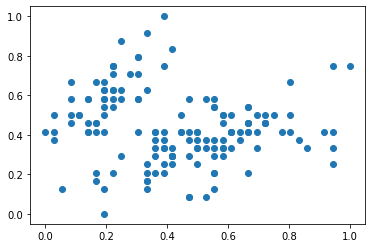

In [49]:
plt.scatter(df_n['sepal length (cm)'], df_n['sepal width (cm)'])

In [56]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_n[['sepal length (cm)', 'sepal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [57]:
df_n['target'] = y_predicted
df_n.head(10)

,sepal length (cm),sepal width (cm),target
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
5,0.305556,0.791667,1
6,0.083333,0.583333,1
7,0.194444,0.583333,1
8,0.027778,0.375000,1
9,0.166667,0.458333,1


In [58]:
km.cluster_centers_

array([[0.40483539, 0.28009259],
       [0.19897959, 0.60459184],
       [0.69562648, 0.45390071]])

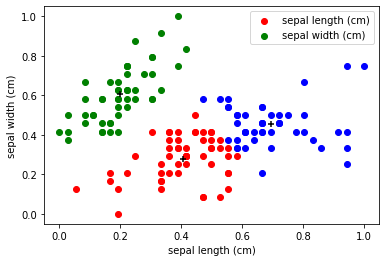

In [59]:
df1_n = df_n[df_n.target==0]
df2_n = df_n[df_n.target==1]
df3_n = df_n[df_n.target==2]

plt.scatter(df1_n['sepal length (cm)'], df1_n['sepal width (cm)'], color='red')
plt.scatter(df2_n['sepal length (cm)'], df2_n['sepal width (cm)'], color='green')
plt.scatter(df3_n['sepal length (cm)'], df3_n['sepal width (cm)'], color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker="+")

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(['sepal length (cm)', 'sepal width (cm)'])